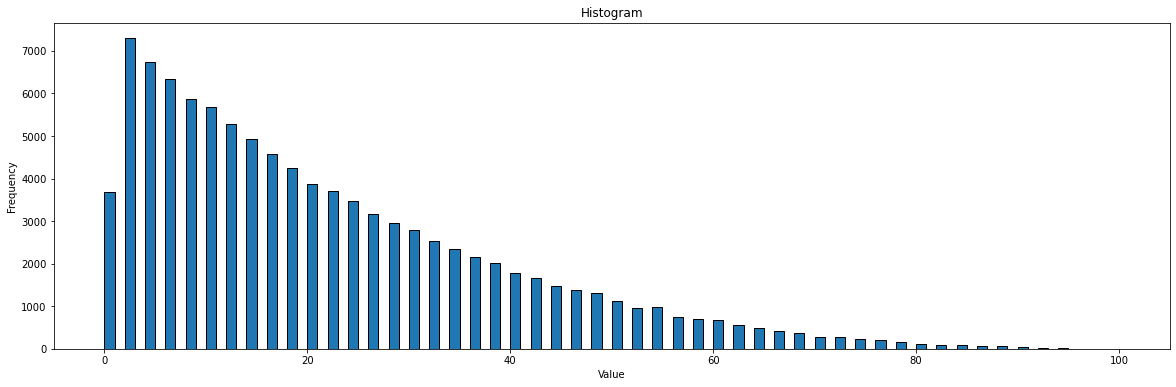

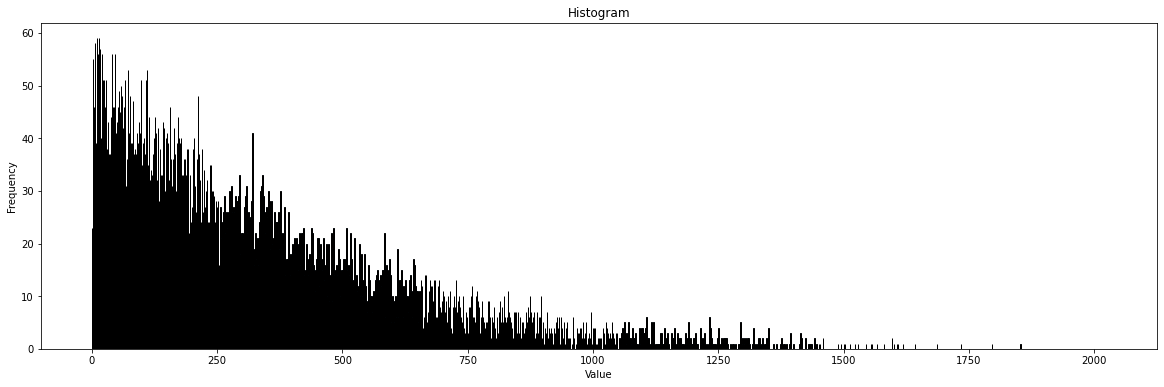

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def recursion(S, n):
    N = []
    for i in range(n):
        T = S
        while len(T) > 1:
            random_indices = np.random.choice(len(T), size=2, replace=False)

            X = T[random_indices]

            # Remove the randomly selected elements from the list
            T = np.delete(T, random_indices)

            a = X[0]
            b = X[1]

            c = abs(a-b)

            T = np.append(T, c)


        N.append(T[0])
    return N

def plot(M, m): 
    S = np.arange(1,M+1)
    data = recursion(S,m)
    plt.figure(figsize=(20, 6))
    plt.hist(data, bins=M, range = (0,M), edgecolor='black')  # Specify number of bins and edge color
    plt.title('Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

plot(100, 100000)
plot(2024, 10000)

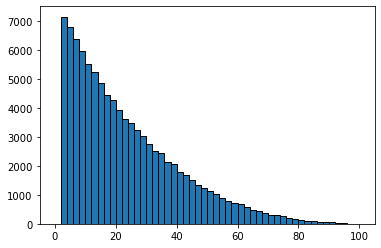

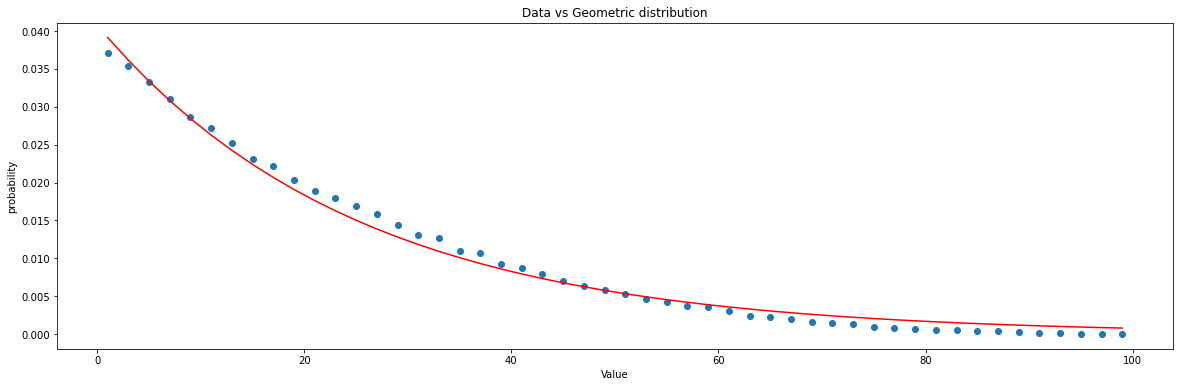

[0.03915125]


In [3]:
def recursion(S, n):
    N = []
    for i in range(n):
        T = S # T is just a dummy variable
        while len(T) > 1:
            random_indices = np.random.choice(len(T), size=2, replace=False)

            X = T[random_indices]

            # Remove the randomly selected elements from the list
            T = np.delete(T, random_indices)

            a = X[0]
            b = X[1]

            c = abs(a-b)

            T = np.append(T, c)

        if T[0] != 0: # ignoring when we are left with 0 as this is an outlier on the distribution and disturbs the fit.
            N.append(T[0])
        else:
            continue
    return N

def plot(M, m): 
    S = np.arange(1,M+1)
    data = recursion(S,m)
    hist, bins, _  = plt.hist(data, bins=int(np.floor(M/2)), range = (0,M), edgecolor='black')
    p_data = normalise(np.append(hist[1:],0), bins)
    X = np.arange(1,M+1,2)
    return X, p_data

def geometric_pmf(x, a):
    return a*(1-a)**(x-1)

def normalise(hist, bins):

    # Compute total number of observations
    total_count = np.sum(hist)

    # Compute width of each bin
    bin_widths = np.diff(bins)

    # Normalize counts by total count and bin width
    probabilities = hist / total_count / bin_widths

    return probabilities


x_data, y_data = plot(100,100000)

p_opt, p_cov = curve_fit(geometric_pmf, x_data, y_data)

plt.figure(figsize=(20, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, geometric_pmf(x_data, *p_opt), color='red', label='Fitted function')

plt.title('Data vs Geometric distribution')
plt.xlabel('Value')
plt.ylabel('probability')
plt.show()
print(p_opt)

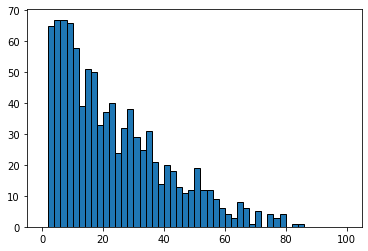

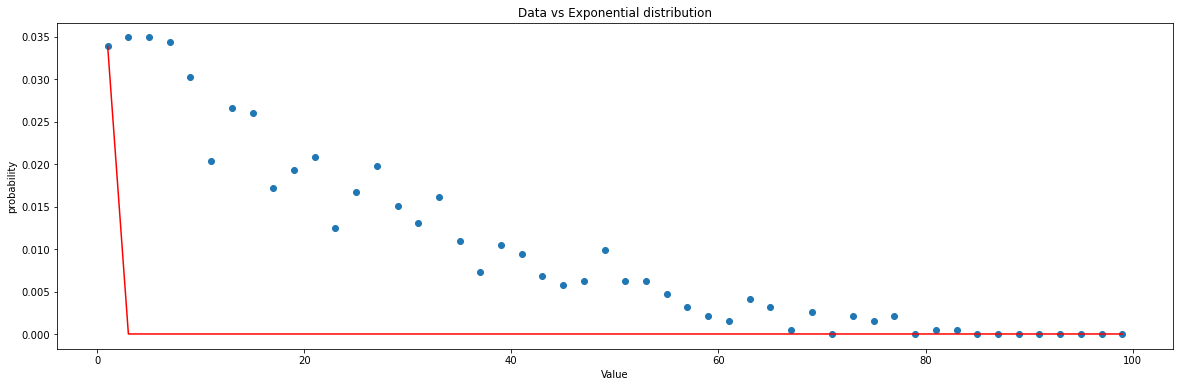

In [5]:
def exponential_pmf(x, a):
    return a*np.exp(1)**(-a*x)


x_data, y_data = plot(100,1000)

p_opt, p_cov = curve_fit(exponential_pmf, x_data, y_data)

plt.figure(figsize=(20, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, exponential_pmf(x_data, *p_opt), color='red', label='Fitted function')

plt.title('Data vs Exponential distribution')
plt.xlabel('Value')
plt.ylabel('probability')
plt.show()